# **The Effects of Automobile Dependency in the United States**
## Contributors: Nicholas Breymaier and Zachary Osborne
Nicholas UID: 117920871 \\
Zachary UID: 117941609

# Introduction
A place, ranging from a neighborhood-scale to nation-scale geographic area, is referred to as automobile dependent, or car dependent, when the only means by which residents are realistically capable of reaching necessities is by driving a personal automobile. By necessities we mean any locations necessary to live a successful life in modern society, such as institutions of education, jobs, and grocery stores.

This analysis will focus prinarily on automobile dependency in the United States, but data from other countries will be used for comparative purposes.

## The Importance of Automobile Dependency
Some of the information presented in this section is drawn directly from the datasets we analyze in this project, and will be cited as such. Please see the bibliography at the end of this document/website for sources.

## Relevance in the Field of Data Science
Coverage by the major media institutions in the United States fails to correlate with what Americans die from (!cite 1). Among other things, the need for major media institutions to "keep up" with the incessant and immediate news which is able to be transmitted via social media has lead to institutions (!cite) switching to more eyecatching topics to maintain viewership and therefore advertisement revenue. Relying on the media is therefore not an effective way to build public awareness about systemic problems.

Data Science offers a promising alternative medium of news coverage as opposed to televised reports transmitted by major media corporations and news transmitted via social media because it is significantly less prone to outlier bias. This project hopes to demonstrate that data science can be used to generate awareness about important yet overlooked societal issues by doing so with car dependency.

# Step 1: Data Collection
Thankfully, the US National Highway Traffic Safety Administration (NHTSA) keeps detailed data related to traffic fatalities, which serves as a good starting point for discussing the problem of car dependency.

https://www-fars.nhtsa.dot.gov/Main/index.aspx

In [25]:
import requests
from bs4 import BeautifulSoup as bs
import pandas as pd

# # Use the python requests library to extract the data from the website.
# web_extract = requests.get(
#     'https://www-fars.nhtsa.dot.gov/Main/index.aspx').text

# # Organise and make legible the extracted html using the BeautifulSoup library.
# web_extract = bs(web_extract)
# web_extract.prettify()

# loci = web_extract.find('table')

# # Extract the html tables into pandas dataframes. Tables 1–9 were
# # stylistic elements in the website.
# nhtsa_data = pd.read_html(str(loci))[10]

nhtsa_data = pd.read_feather('nhtsa_data.feather')
nhtsa_data.head();

# Step 2: Data Processing
The NHTSA crash fatality data we extracted is far from tidy, so we shall clean and organise it here. 

Firstly, this DataFrame holds features in its rows and observations in its columns. Obervations are, in this case, years. We therefore transpose the dataframe to make the rows observations and the columns features.

In [26]:
# We will want these to be the column labels after transposing the DataFrame.
nhtsa_data = nhtsa_data.set_index('Unnamed: 0')

# Transpose the DataFrame.
nhtsa_data = nhtsa_data.transpose()

# Rename index column to 'Year' and sort data chronologically.
nhtsa_data.columns.names = ['Year']
nhtsa_data = nhtsa_data.sort_index()

nhtsa_data.head();

The original data table groups its features into various categories via extra, empty features which essentially function as "headers". This is a very messy way to do this, and furthermore having the categorization within the table is unnecessary. Here, we remove the unnecessary columns and rename the rest for clarity and to preserve information which would otherwise have been lost during the purging of the headers.

In [27]:
# Drop empty header columns.
columns_to_remove = [
    'Motor Vehicle Traffic Crashes', 
    'Traffic Crash Fatalities',
    'Vehicle Occupants', 
    'Nonmotorists',
    'Other National Statistics', 
    'National Rates: Fatalities'
]
nhtsa_data.drop(columns=columns_to_remove, inplace=True)

# Rename remaining columns for clarity using multi-indexing.
#TODO!

nhtsa_data.head()

Year,Fatal Crashes,Drivers,Passengers,Unknown,Sub Total1,Motorcyclists,Pedestrians,Pedalcyclists,Other/ Unknown,Sub Total2,Total*,Vehicle Miles Traveled (Billions),Resident Population (Thousands),Registered Vehicles (Thousands),Licensed Drivers (Thousands),Fatalities per 100 Million Vehicle Miles Traveled,"Fatalities per 100,000 Population","Fatalities per 100,000 Registered Vehicles","Fatalities per 100,000 Licensed Drivers"
1994,36254.0,21596.0,10294.0,108.0,31998.0,2320.0,5489.0,802.0,107.0,6398.0,40716.0,2358.0,260327.0,192497.0,175403.0,1.73,15.64,21.15,23.21
1995,37241.0,22370.0,10576.0,118.0,33064.0,2227.0,5584.0,833.0,109.0,6526.0,41817.0,2423.0,262803.0,197065.0,176628.0,1.73,15.91,21.22,23.68
1996,37494.0,22572.0,10860.0,102.0,33534.0,2161.0,5449.0,765.0,154.0,6368.0,42065.0,2484.0,265229.0,201631.0,179539.0,1.69,15.86,20.86,23.43
1997,37324.0,22730.0,10765.0,114.0,33609.0,2116.0,5321.0,814.0,153.0,6288.0,42013.0,2552.0,267784.0,203568.0,182709.0,1.65,15.69,20.64,22.99
1998,37107.0,22654.0,10327.0,107.0,33088.0,2294.0,5228.0,760.0,131.0,6119.0,41501.0,2628.0,270248.0,208076.0,184861.0,1.58,15.36,19.95,22.45


# Step 3: Exploratory Analysis & Data Visualization

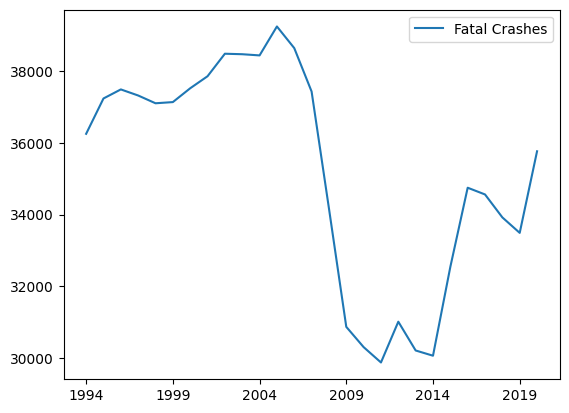

In [ ]:
nhtsa_data.plot(y='Fatal Crashes');

# Step 4: Modeling and Further Analysis with Machine Learning and Statistics

# Step 5: Data Interpretation and Insight

# Further Information for the Inquisitive Reader

There are many advocates and advocacy groups, from local international, fighting to spread awareness about this issue and push for solutions to be implemented. Here a few are listed:
> * <a href='https://www.youtube.com/@NotJustBikes/featured'> Not Just Bikes</a>, courtesy of Jason Slaughter \\
> Becoming the most popular 'urban planning' channel on YouTube as of 2022, Not Just Bikes explores dutch city design 


# Bibliography
https://ourworldindata.org/does-the-news-reflect-what-we-die-from 1
https://www-fars.nhtsa.dot.gov/Main/index.aspx \\ 2
https://nepis.epa.gov/Exe/ZyPDF.cgi?Dockey=P1013L1O.pdf 3